In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Random Sample Imputataion:Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

#When should it be used? It assumes that the data are missing completely at random(MCAR)

In [5]:
median=df['Age'].median()
median

28.0

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
def impute_nan(df,variable,median):
  df[variable+"median"]=df[variable].fillna(median)
  df[variable+"random"]=df[variable]
  #It will fill the NaN values randomly
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #pandas work when we merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+"random"]=random_sample

In [8]:
impute_nan(df,'Age',median)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agemedian,Agerandom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [10]:
df.Agerandom.isnull().sum()

0

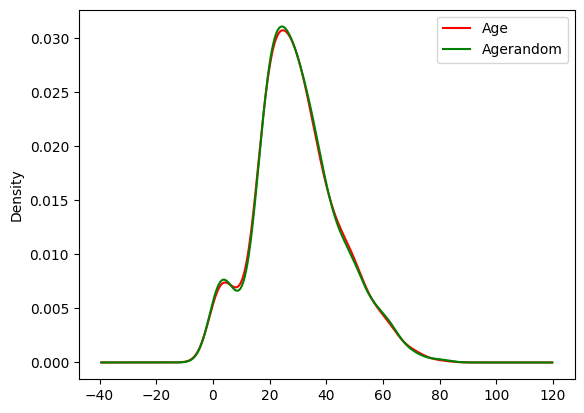

In [11]:
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
df.Age.plot(kind='kde',ax=ax,color='red')
df.Agerandom.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#Advantages of Random Sample Imputation:
#1.Easy to implement
#2.There is no change or distortion in the variance



#Disadvantages of Random Sample Imputation:
#1.Always randomness wont work